In [1]:
!pip install pandas scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Einlesen der Dateien
bakery_data = pd.read_csv('/content/bakery_data (3).csv')
bakery_target = pd.read_csv('/content/bakery_target (3).csv')

# Kategorische Variablen in numerische Werte konvertieren
label_encoder = LabelEncoder()
for column in ['weekday', 'month', 'store', 'product']:
    bakery_data[column] = label_encoder.fit_transform(bakery_data[column])

# Zielvariable hinzufügen
bakery_data['demand'] = bakery_target['demand']

# Entfernen der 'date' Spalte, da sie im aktuellen Format nicht verwendet wird
X = bakery_data.drop(['demand', 'date'], axis=1)
y = bakery_data['demand']

# Normalisierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aufteilen der Daten in Trainings- und Testset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP-Modell trainieren
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Vorhersagen mit MLP-Modell
y_pred_mlp = mlp.predict(X_test)

# Metriken für MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# XGBoost-Modell trainieren
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Vorhersagen mit XGBoost-Modell
y_pred_xgb = xg_reg.predict(X_test)

# Metriken für XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MLP Mean Squared Error: {mse_mlp:.2f}")
print(f"MLP R^2 Score: {r2_mlp:.2f}")

print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost R^2 Score: {r2_xgb:.2f}")

MLP Mean Squared Error: 5557.20
MLP R^2 Score: 0.71
XGBoost Mean Squared Error: 6853.27
XGBoost R^2 Score: 0.64


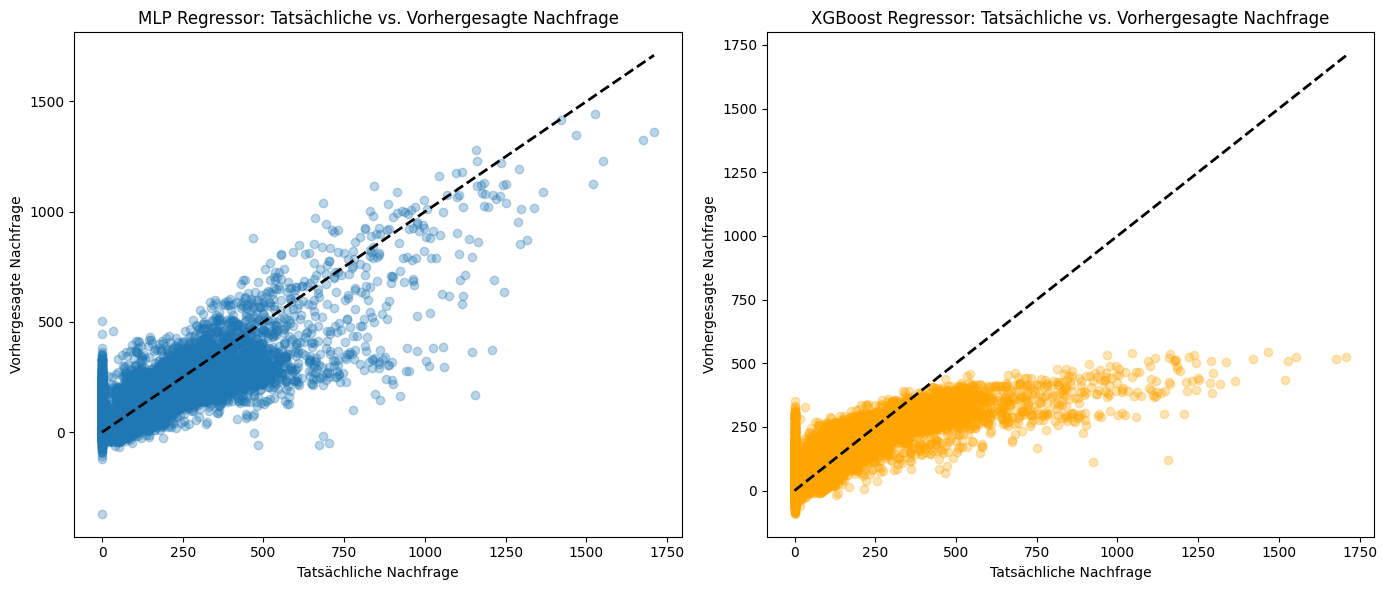

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot für MLP Regressor
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mlp, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Nachfrage')
plt.ylabel('Vorhergesagte Nachfrage')
plt.title('MLP Regressor: Tatsächliche vs. Vorhergesagte Nachfrage')

# Plot für XGBoost Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Tatsächliche Nachfrage')
plt.ylabel('Vorhergesagte Nachfrage')
plt.title('XGBoost Regressor: Tatsächliche vs. Vorhergesagte Nachfrage')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# MLP-Modell trainieren
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Vorhersagen mit MLP-Modell
y_pred_mlp = mlp.predict(X_test)

# Metriken für MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# XGBoost-Modell trainieren
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)
xg_reg.fit(X_train, y_train)

# Vorhersagen mit XGBoost-Modell
y_pred_xgb = xg_reg.predict(X_test)

# Metriken für XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

(mse_mlp, r2_mlp), (mse_xgb, r2_xgb)